# Homework 2
Giovanni Sciortino s302959 \\
Giuseppe Suriano s296605

## Exercise 1

Draw the graph 

In [ ]:
!pip uninstall torch-geometric
!pip install pyg-nightly

In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
G = nx.DiGraph()

G.add_nodes_from(['o', 'a', 'b', 'c', 'd'])

In [ ]:
E = {
  'o':{
		'a':2/5,
		'b':1/5
	},
	'a':{
		'b':3/4,
		'c':1/4
	},
	'b':{
		'o':1/2,
		'c':1/2
	},
	'c':{
		'b':1/3,
		'd':2/3
	},
	'd':{
		'a':1/3,
		'c':1/3
	}
}
edge_list = [(u,v,w) for u,e in E.items() for v,w in e.items()]
G.add_weighted_edges_from(edge_list)

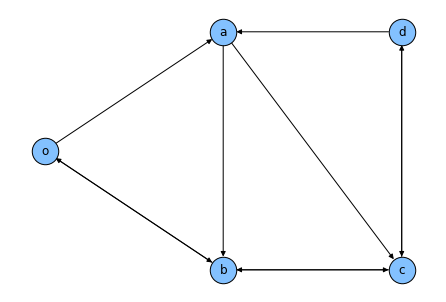

In [ ]:
# set positions of nodes to have the same disposition of the given figure
posG = {'o':[1,1], 'a':[3,2], 'b':[3,0], 'c':[5,0], 'd':[5,2]}

options = {"edgecolors": "black", "node_size": 700}
nx.draw(G, posG, with_labels=True, node_color="#83C1FF", **options)
plt.savefig("Graph_ex1a.svg")

In [ ]:
!pip install --upgrade scipy networkx

In [ ]:
W = nx.adjacency_matrix(G).toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W
indices = dict()
for i in range(len(G.nodes)):
    indices[list(G.nodes)[i]] = i


<ipython-input-7-03a2de55030d>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()


In [ ]:
W

array([[0.        , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.        ]])

### Point a 

In [ ]:
# function that simulates a move and returns time taken and destination
def move(G, v):
	out_deg = degrees[indices[v]]
	t_next = random.expovariate(out_deg) # time to wait before moving from node v
	x = random.random()
	# *w # w is for normalization, in this way x can be used as in Hint 2
	cumulative = 0 # used to compute cumulative distribution
	for node,edge in G[v].items():
		cumulative += edge['weight']/out_deg
		if x <= cumulative: # lower bound found
			return t_next, node
	return t_next, node

In [ ]:
def return_time(G, o, d, n_tests=int(1e5)):
	sum_return_times = 0
	for _ in range(n_tests):
		node = o
		while True:
			# time , node to move  = move ( G, node from )
			t_next, node = move(G, node)
			sum_return_times += t_next
			if node == d:
				break
	return sum_return_times/n_tests

Compute by simulation  $\mathbf{E}_a[T_a^+]$

In [ ]:
print(f"{return_time(G,'a','a'):.2f}")

6.79


### Point b

In [ ]:
w_star = np.max(degrees)
P_bar = W/w_star
# add the diagonal part
P_bar = P_bar + np.diag(np.ones(len(degrees))-np.sum(P_bar,axis=1))

In [ ]:
values, vectors = np.linalg.eig(P_bar.T)
index = np.argmax(values.real)
pi_bar = vectors[:, index].real
pi_bar = pi_bar/np.sum(pi_bar)

print("pi_bar=", pi_bar)
print(f"E_a[T_a] =  {(1/(pi_bar[indices['a']] * degrees[indices['a']])):.2f}")

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]
E_a[T_a] =  6.75


### Point c

In [ ]:
print(f"{return_time(G,'o','d',10000):.2f}")

8.82


### Point d

In [ ]:
def hitting_time(o,d,P):
  o = indices[o]
  d = indices[d]

  P_d = P.copy()

  w_inv_d = [1/wi for wi in degrees]

  # because all the hitting times do not depend on the nodes that d can reach
  P_d[d] = [0]*len(G.nodes)

  # because the hitting time in d is  0
  w_inv_d[d] = 0
  for i in range(len(G.nodes)):
    P_d[i][i] -= 1
  P_d = -np.array(P_d)
  w_inv_d = np.array(w_inv_d)
  e = np.linalg.solve(P_d, w_inv_d)
  return e,

In [ ]:
E = hitting_time('o','d',P)

So the $\mathbf{E}_o[T_d]$ is the following

In [ ]:
print(f"{E[0][0]:.2f}")

8.79


### Point e

From theory, we know that if a graph is strongly connected and is also aperiodic, a French-DeGroot dynamics will always converge to a consensus state, whatever it is the initial condition x(0).

In [ ]:
#see if the graph is strongly connected by checking that the number of node of the 
#condensation graph is equal to one
CG = nx.algorithms.components.condensation(G)

len(CG.nodes)

1

In [ ]:
#check if the graph is aperiodic
nx.algorithms.dag.is_aperiodic(G)

True

In [ ]:
P

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ]])

In [ ]:
x0 = np.random.rand(len(G.nodes))

#just printing the initial conditions

print("[%s]"%(", ".join([f'{x:.5f}' for x in x0])))

[0.50346, 0.40294, 0.89080, 0.80480, 0.10758]


In [ ]:
values, vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi_ = vectors[:, index].real
pi_ = pi_/np.sum(pi_)

#pi_ is the invariant distribution

alpha = sum(pi_ * x0)

#alpha is the consesus value

print(alpha)

0.5967834581834678


In [ ]:
for n in range(100):
    x0 = P @ x0
print("x(100):", "[%s]"%(", ".join([f'{x:.5f}' for x in x0])))

x(100): [0.59678, 0.59678, 0.59678, 0.59678, 0.59678]


### Point f

In [ ]:
mu = 0.8
sigma = 0.5

In [ ]:
def consensus_variance(P, mu, sigma, n_iter=int(1e3)):
  res =[]
  for _ in range(n_iter):

    # initial conditions from a normal distibution with mean mu and variance sigma^2
    x0 = np.random.normal(mu,sigma,5)

    for n in range(100):
      x0 = P @ x0
    
    res.append(x0.mean())

  return np.var(res)

In [ ]:
estimation = f'{consensus_variance(P, mu, sigma):.3f}'
print(estimation)

0.059


Theoretical computation of variance of consensus

In [ ]:
values, vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi = vectors[:, index].real
pi = pi/np.sum(pi)
v = np.sum(np.square(pi)*(sigma**2))
print(f'{v:.3f}')

0.053


### Point g

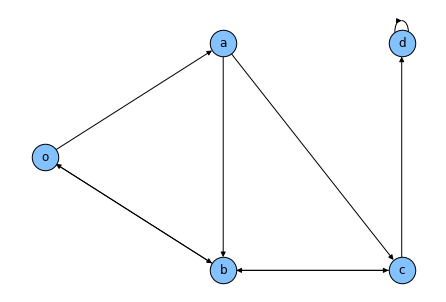

In [ ]:
GG = G.copy()
edges = [('d','a'),('d','c')]
for e in edges:
  GG.remove_edge(*e)
GG.add_edge('d', 'd') # it is a design technique to resolve the problem of singularity
posG = {'o':[1,1], 'a':[3,2], 'b':[3,0], 'c':[5,0], 'd':[5,2]}

options = {"edgecolors": "black", "node_size": 700}
nx.draw(GG, posG, with_labels=True, node_color="#83C1FF", **options)
plt.savefig("Graph_ex1g.svg")

In [ ]:
WG = nx.adjacency_matrix(GG).toarray()
degreesG = np.sum(WG,axis=1)
DG = np.diag(degreesG)
PG = np.linalg.inv(DG) @ WG
CGG = nx.algorithms.components.condensation(GG)
sinks = list(nx.algorithms.components.attracting_components(GG))
print('number of sinks:', len(sinks))
print('is aperiodic:', all(nx.is_aperiodic(GG.subgraph(t)) for t in sinks))

number of sinks: 1
is aperiodic: True


<ipython-input-36-66438a9efb5e>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  WG = nx.adjacency_matrix(GG).toarray()


In [ ]:
PG

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

Removing the outgoing edges from $d$, the graph is not strongly connected anymore. \
Now the asymptotic behaviour of the dynamics is determined only by the initial state of the nodes in the sinks of the condensation graph, because they are not influenced by the rest of the graph. Moreover, the sink contains the support of the invariant distribution, which determines the consensus value. \
As in this case there is only one attracting component and it is aperiodic, a consensus will be reached, and its value will be the initial opinion of $d$.

In [ ]:
# define initial condition
x0 = np.random.rand(len(G.nodes)-1)
x0 = np.append(x0, 0)
print("Initial state with x(0) in position 'd' equal to 0:", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end = '\n')

for _ in range(1000):
    x0 = PG @ x0
print("x(0)_d = 0 -> x(1000) = ", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end = '\n\n')

# define initial condition
x0 = np.random.rand(len(G.nodes)-1)
x0 = np.append(x0, 1)
print("Initial state with x(0) in position 'd' equal to 1:", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end='\n')

for _ in range(1000):
    x0 = PG @ x0
print("x(0)_d = 1 -> x(1000) = ", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end = '\n\n')

Initial state with x(0) in position 'd' equal to 0: [0.97, 0.99, 0.20, 0.94, 0.00]
x(0)_d = 0 -> x(1000) =  [0.00, 0.00, 0.00, 0.00, 0.00]

Initial state with x(0) in position 'd' equal to 1: [0.86, 0.16, 0.07, 0.29, 1.00]
x(0)_d = 1 -> x(1000) =  [1.00, 1.00, 1.00, 1.00, 1.00]



In [ ]:
values, vectors = np.linalg.eig(PG.T)
index = np.argmax(values.real)
pi = vectors[:, index].real
pi = pi/np.sum(pi)
pi

array([0., 0., 0., 0., 1.])

This is the less democratic network we can construct. In this graph the consensus value is exactly the initial state of node 'd', because the condensation graph has 1 sink only, which is node 'd'.

$$
\pi = \delta^{(d)} = [0,0,0,0,1].
$$

In this graph all the invariant distribution centrality is on node 'd'. Thus the variance of the consensus state equals the variance of the single state. 

$$V[\alpha] = \sigma^2\sum_{i} \pi_i^2 = \sigma^2\pi_d^2 = \sigma^2$$
And by simulating we can see that:

In [ ]:
mu = 0.8
sigma = 0.5

estimation = f'{consensus_variance(PG, mu, sigma):.3f}'
print("Simulated variance of consensus: ",estimation)
v = np.sum(np.square(pi)*(sigma**2)) #that is clearly equal to sigmaˆ2
print(f'Theoretical computation of variance of consensus: {v:.3f}')

Simulated variance of consensus:  0.249
Theoretical computation of variance of consensus: 0.250


### Point h

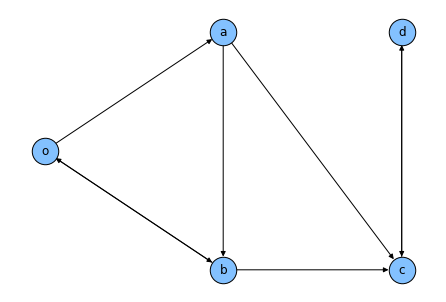

In [ ]:
GH=G.copy()
GH.remove_edges_from([('c', 'b'), ('d', 'a')])
posG = {'o':[1,1], 'a':[3,2], 'b':[3,0], 'c':[5,0], 'd':[5,2]}

options = {"edgecolors": "black", "node_size": 700}
nx.draw(GH, posG, with_labels=True, node_color="#83C1FF", **options)
plt.savefig("Graph_ex1h.svg")

In [ ]:
WH = nx.adjacency_matrix(GH).toarray()
degreesH = np.sum(WH,axis=1)
DH = np.diag(degreesH)
PH = np.linalg.inv(DH) @ WH
CGH = nx.algorithms.components.condensation(GH)
sinks = list(nx.algorithms.components.attracting_components(GH))
print('number of sinks:', len(sinks))
print('is aperiodic:', all(nx.is_aperiodic(GH.subgraph(t)) for t in sinks))

number of sinks: 1
is aperiodic: False


<ipython-input-39-dcde5f62dcb7>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  WH = nx.adjacency_matrix(GH).toarray()


[{'c', 'd'}, {'a', 'b', 'o'}]

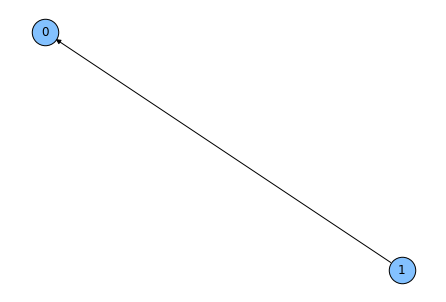

In [ ]:
nx.draw(CGH, with_labels=True, node_color="#83C1FF", **options)
list(nx.algorithms.components.strongly_connected_components(GH))

This case is similar to the previous one, but in this case we have two nodes ($c$ and $d$) in the sink of the condensation graph (instead of only $d$). \
Now the attracting component is not aperiodic, so a consensus will (generally) not be reached.\
A consensus will be reached only in the cases where $x_c(0) = x_d(0)$

In [ ]:
# define initial condition
x0 = np.random.rand(len(GH.nodes))
print("Initial state with x(0) with DIFFERENT value in position 'c' and 'd': ", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end = '\n')

for _ in range(1000):
    x0 = PH @ x0
print("x(0)_c != x(0)_d  -> x(1000) = ", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end = '\n\n')

# define initial condition
x0 = np.random.rand(len(GH.nodes)-2)
x0 = np.append(x0, 1)
x0 = np.append(x0, 1)
print("Initial state with x(0) with SAME value in position 'c' and 'd': ", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end='\n')

for _ in range(1000):
    x0 = PH @ x0
print("x(0)_c = x(0)_d -> x(1000) = ", "[%s]"%(", ".join([f'{x:.2f}' for x in x0])), end = '\n\n')

Initial state with x(0) with DIFFERENT value in position 'c' and 'd':  [0.41, 0.45, 0.47, 0.60, 0.75]
x(0)_c != x(0)_d  -> x(1000) =  [0.67, 0.66, 0.71, 0.60, 0.75]

Initial state with x(0) with SAME value in position 'c' and 'd':  [0.05, 0.29, 0.83, 1.00, 1.00]
x(0)_c = x(0)_d -> x(1000) =  [1.00, 1.00, 1.00, 1.00, 1.00]



As we can see in the first case the consensus is not reached, while in the second case it is reached and the opinions of all the node after 100 simulation are equal to $x_c(0) = x_d(0)$

## Exercise 2

<ipython-input-40-614537a734e1>:37: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).toarray()


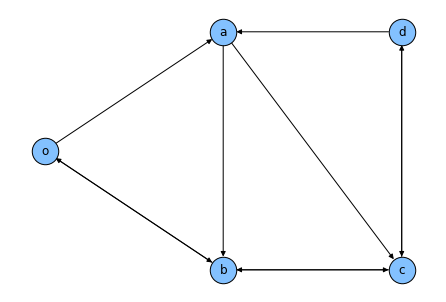

In [ ]:
G = nx.DiGraph()

G.add_nodes_from(['o', 'a', 'b', 'c', 'd'])

E = {
  'o':{
		'a':2/5,
		'b':1/5
	},
	'a':{
		'b':3/4,
		'c':1/4
	},
	'b':{
		'o':1/2,
		'c':1/2
	},
	'c':{
		'b':1/3,
		'd':2/3
	},
	'd':{
		'a':1/3,
		'c':1/3
	}
}
edge_list = [(u,v,w) for u,e in E.items() for v,w in e.items()]
G.add_weighted_edges_from(edge_list)

# set positions of nodes to have the same disposition of the given figure
posG = {'o':[1,1], 'a':[3,2], 'b':[3,0], 'c':[5,0], 'd':[5,2]}

options = {"edgecolors": "black", "node_size": 700}
nx.draw(G, posG, with_labels=True, node_color="#83C1FF", **options)
#plt.savefig("Graph_ex1.svg")

W = nx.adjacency_matrix(G).toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W
indices = dict()
for i in range(len(G.nodes)):
    indices[list(G.nodes)[i]] = i


### Point a: Particle perspective

In [ ]:
w_star = np.max(degrees)
P_bar = W/w_star
# add the diagonal part
P_bar = P_bar + np.diag(np.ones(len(degrees))-np.sum(P_bar,axis=1))

In [ ]:
def move (P,n):
  return np.random.choice(len(P[n,:]),p=P[n,:])

In [ ]:
last100 = [1] * 100
times = [0] * 100
clock = 0
count = 0

while clock < 10000:

  #time to observe a move
  t = random.expovariate(100)

  #index of the random particle to move
  p_to_move =  int(np.random.random()*100)

  #index of the node to which the particle has to move
  idx_to_node = move(P_bar,last100[p_to_move]) 

  clock += t

  # if the particle is moving from a node different to a and moving to the node a
  if last100[p_to_move] != 1 and idx_to_node == 1:

    # update the cumulative return time for this particle
    times[p_to_move] = clock

    # increment the counter of the returns
    count += 1
  
  # do the move
  last100[p_to_move] = idx_to_node

print(f"{(sum(times)/count):.2f}")
  

6.77


### Point b: Node perspective

We deploy a system-wide Poisson clock with rate 100. Then, at each tick we randomly, and proportionally to the number of particles in the different nodes, select a node from which we should move a particle. Then a particle from the selected node will move according to the transition probability matrix P .

In [ ]:
ws = degrees.max()
P_ = W / ws
P_ -= np.diag(P_)
P_ += np.diag(1 - degrees/ws*(1-np.diag(P)))
P_

array([[0.4       , 0.4       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333]])

exe code

In [ ]:
def choice(listato):

  # total number of the particles
  valmax = np.sum(listato)

  # random number to choose a node proportionally to the umber of particles that are on it
  x = int(random.random()*valmax)

  cum = np.cumsum(listato)
  for index, val in enumerate(cum):
    if x<val:
      return index
  return index

In [ ]:
def move(P, v):

	#
	x = random.random()
	c = 0 # used to compute cumulative distribution
	for u,w in enumerate(list(P_[v])):
		c += w
		if x <= c: # lower bound found
			return u
	return u

In [ ]:
#collection of the nodes' states 
table = np.array([])
clock = 0

t = 0
ts = []

# number of particles in the nodes
last5 = [100,0,0,0,0]

while clock<=60:

  ts.append(t)
  table = np.append(table,last5)

  last5 = table[-5:].copy()

  #find the node from which move a particle
  movefrom = choice(last5)

  #find the node to which move the particle
  moveto = move(P_,movefrom)

  #move the particle
  last5[movefrom]-=1
  last5[moveto]+=1

  #rate 100 * w*
  t = random.expovariate(100)
  clock+=t
  
n_iter = len(ts)
table = table.reshape((-1,5))

tablemedia = np.sum(table,axis = 0)
tablemedia = tablemedia/n_iter
tablemedia

array([20.19078062, 15.12012113, 21.59118439, 21.52506729, 21.57284657])

In [ ]:
values, vectors = np.linalg.eig(P_.T)
index = np.argmax(values.real)
pi_ = vectors[:, index].real
pi_ = pi_/np.sum(pi_)
pi_

array([0.18518519, 0.14814815, 0.22222222, 0.22222222, 0.22222222])

In [ ]:
ts = np.cumsum(ts)

In [ ]:
def time_plot(t, v, labels, img, exclusions=[]):
	fig = plt.figure(dpi=200, figsize=(9,3))
	ax  = fig.add_subplot(111)
	ax.set_position([0.075,0.15,0.85,0.8])
	for l,i in zip(labels, range(v.shape[0])):
		ax.plot(np.array(t), v[i,:].T, label=l, linewidth=0.8)
	ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
	ax.set_xlabel('time')
	ax.set_ylabel('number of particles')
	#plt.savefig(f'fig/{img}.png')
	return fig

In [ ]:
indices

{'o': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4}

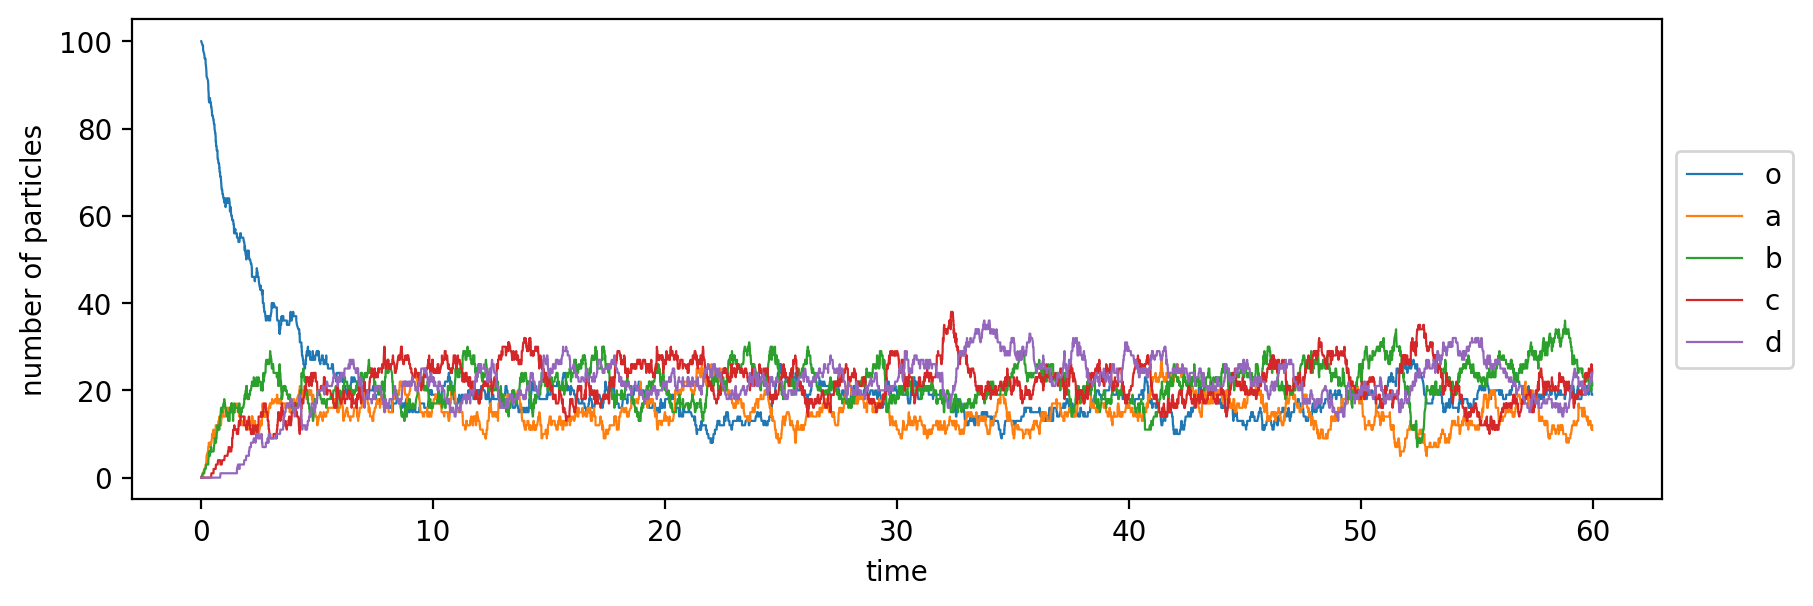

In [ ]:
fig = time_plot(np.array(ts), table.T, indices.keys(), 't')

## Excercise 3

[[0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.25       0.25       0.5       ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         0.        ]]


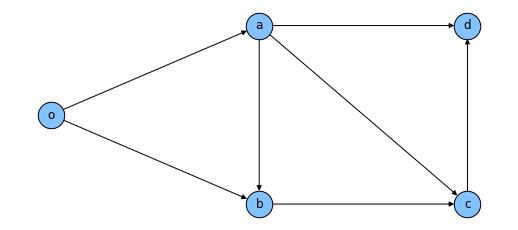

In [ ]:
G3 = nx.DiGraph()
G3.add_nodes_from([ "o", "a", "b", "c", "d"])
G3.add_edges_from([ ("o", "a"), ("o", "b"), ("a", "b"), ("a", "c"), ("a", "d"), ("b", "c"), ("c", "d")])
pos3 = { "o":[1,1], "a":[3,2], "b":[3,0], "c":[5,0], "d":[5,2],  }
fig = plt.figure(1, figsize=(7, 3))

options = {"edgecolors": "black", "node_size": 700}
nx.draw(G3, pos3, with_labels=True, node_color="#83C1FF", **options)

indices = {}
for i in range(len(G3.nodes)):
    indices[list(G3.nodes)[i]] = i

Lambda_open = np.array([[ 0, 3/4, 3/8, 0, 0], 
                        [ 0, 0, 1/4, 1/4, 2/4], 
                        [ 0, 0, 0, 1, 0], 
                        [ 0, 0, 0, 0, 1], 
                        [ 0, 0, 0, 0, 0]])

degrees = np.sum(Lambda_open,axis=1)

#output rate 
degrees[-1] = 2

D = np.diag(degrees)
P = np.linalg.inv(D) @ Lambda_open

print(P)

In [ ]:
def time_plot(t, v, labels, img, exclusions=[]):
	fig = plt.figure(dpi=200, figsize=(9,3))
	ax  = fig.add_subplot(111)
	ax.set_position([0.075,0.15,0.85,0.8])
	for l,i in zip(labels, range(v.shape[0])):
		ax.plot(np.array(t), v[i,:].T, label=l, linewidth=0.8)
	ax.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
	ax.set_xlabel('time')
	ax.set_ylabel('number of particles')
	#plt.savefig(f'fig/{img}.png')
	return fig

### Point a: Proportional rate


In [ ]:
def choice(listato,degrees):

  #number of particles times the degrees = rates of the nodes
  rates = listato * degrees 
  
  #associated times to each node
  times = [random.expovariate(rate) for rate in rates]
  
  #index of the node from wich move a particle
  index = np.argmin(times)
  t = np.min(times)
  return t,index

In [ ]:
def move (P,n):
  #index of node to which move the particle according to the matrix P
  return np.random.choice(len(P[n,:]),p=P[n,:])

In [ ]:
table = np.array([])
clock = 0

t = 0

#time remaining to have a new particle in input
t_new = 0

#timestamps
ts = []
last5 = [0,0,0,0,0]
input_rate = 1

while clock<=60:
  ts.append(clock)
  table = np.append(table,last5)
  last5 = table[-5:].copy()

  t,movefrom = choice(last5,degrees)
  
  # if the new action is after the new particle, insert the particle and consider the new rates
  if t_new - t <= 0:
    t = t_new
    clock += t_new
    
    # new remaining time to input a new particle 
    t_new = random.expovariate(input_rate)

    #increment the number of particles in o
    last5[0] += 1
    continue

  # if i choose d from which move a particle i will only decrese its number of particles
  if movefrom == 4:
    moveto = 4
  
  # instead i will find the node to which move the particle according to P matrix
  else :
    moveto = move(P,movefrom)

  if movefrom != 4:
    last5[moveto]+=1

  last5[movefrom]-=1

  # update the remaining time to input a new particle 
  t_new -= t
  clock += t


table = table.reshape((-1,5))

indices = {}
for i in range(len(G3.nodes)):
    indices[list(G3.nodes)[i]] = i

ts = np.array(ts)

/usr/lib/python3.8/random.py:495: RuntimeWarning: divide by zero encountered in double_scalars
  return -_log(1.0 - self.random())/lambd


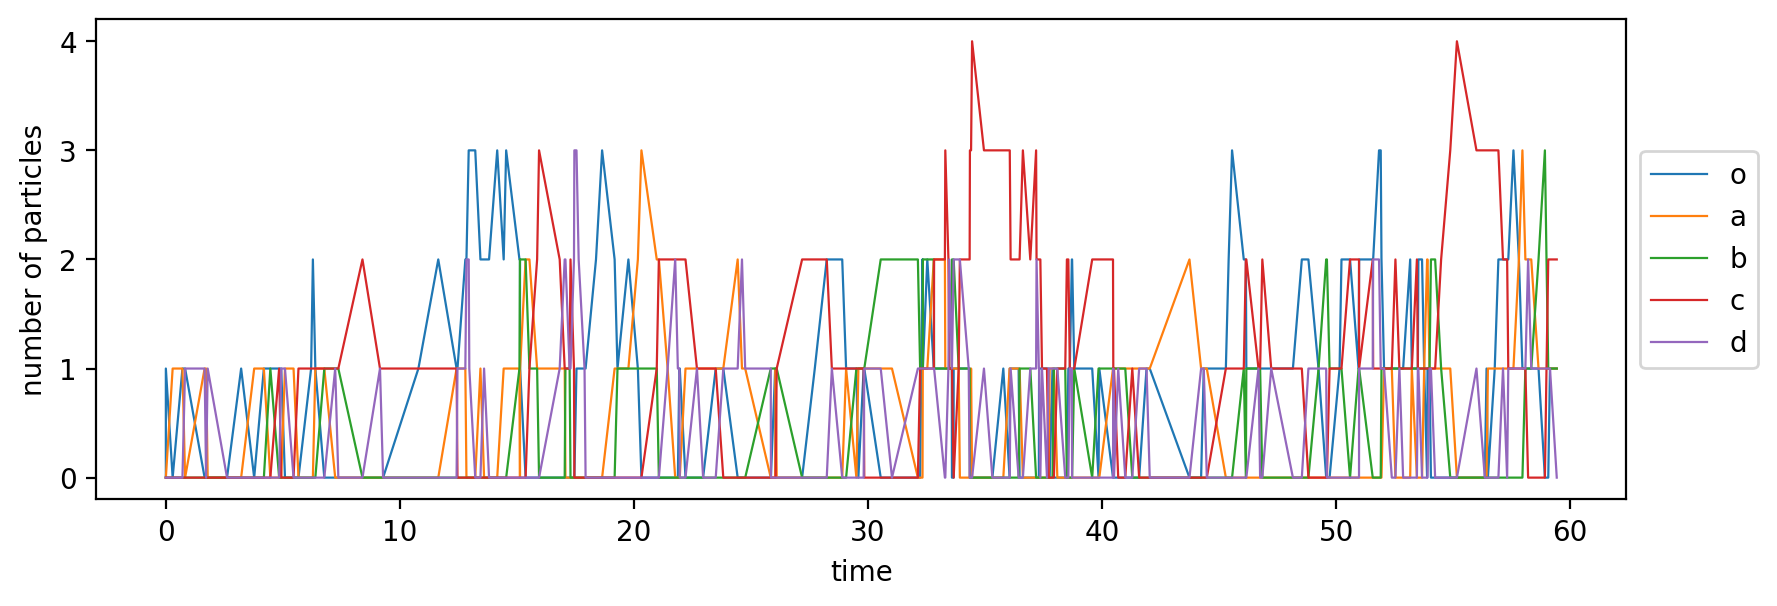

In [ ]:
fig = time_plot(np.array(ts), table.T, indices.keys(), "" )

### Point b: Fixed rate

In [ ]:
def choice(listato,degrees):

  # fixed approach, rates = degrees
  rates = degrees 
  
  # we take in consideration only the rates of the nodes that have particles in it
  times = [random.expovariate(rates[i]) if listato[i] > 0 else np.inf for i in range(len(rates))]
  
  # take the minimum time simulated
  index = np.argmin(times)
  t = np.min(times)

  # there are no particles in the nodes
  if t == np.inf:
    t = -1

  return t,index

In [ ]:
def move (P,n):
  # random sampling proportionally to the row of matrix P
  return np.random.choice(len(P[n,:]),p=P[n,:])

In [ ]:
table = np.array([])
clock = 0
tot = 0
t = 0
t_new = 0
ts = []
last5 = [0,0,0,0,0]
input_rate = 2

while clock<=60:
  ts.append(clock)
  table = np.append(table,last5)
  last5 = table[-5:].copy()

  t,movefrom = choice(last5,degrees)
  
  # if there are no particles in the nodes or it is time to input a new particle
  
  if t <  0 or t_new - t <= 0:
    
    #same code as the proportional approach 
    t = t_new
    clock += t_new
    t_new = random.expovariate(input_rate)
    last5[0] += 1
    continue

  if movefrom == 4:
    moveto = 4
  else :
    moveto = move(P,movefrom)

  if movefrom != 4:
    last5[moveto]+=1

  last5[movefrom]-=1
  t_new -= t
  clock += t

table = table.reshape((-1,5))

indices = {}
for i in range(len(G3.nodes)):
    indices[list(G3.nodes)[i]] = i

ts = np.array(ts)

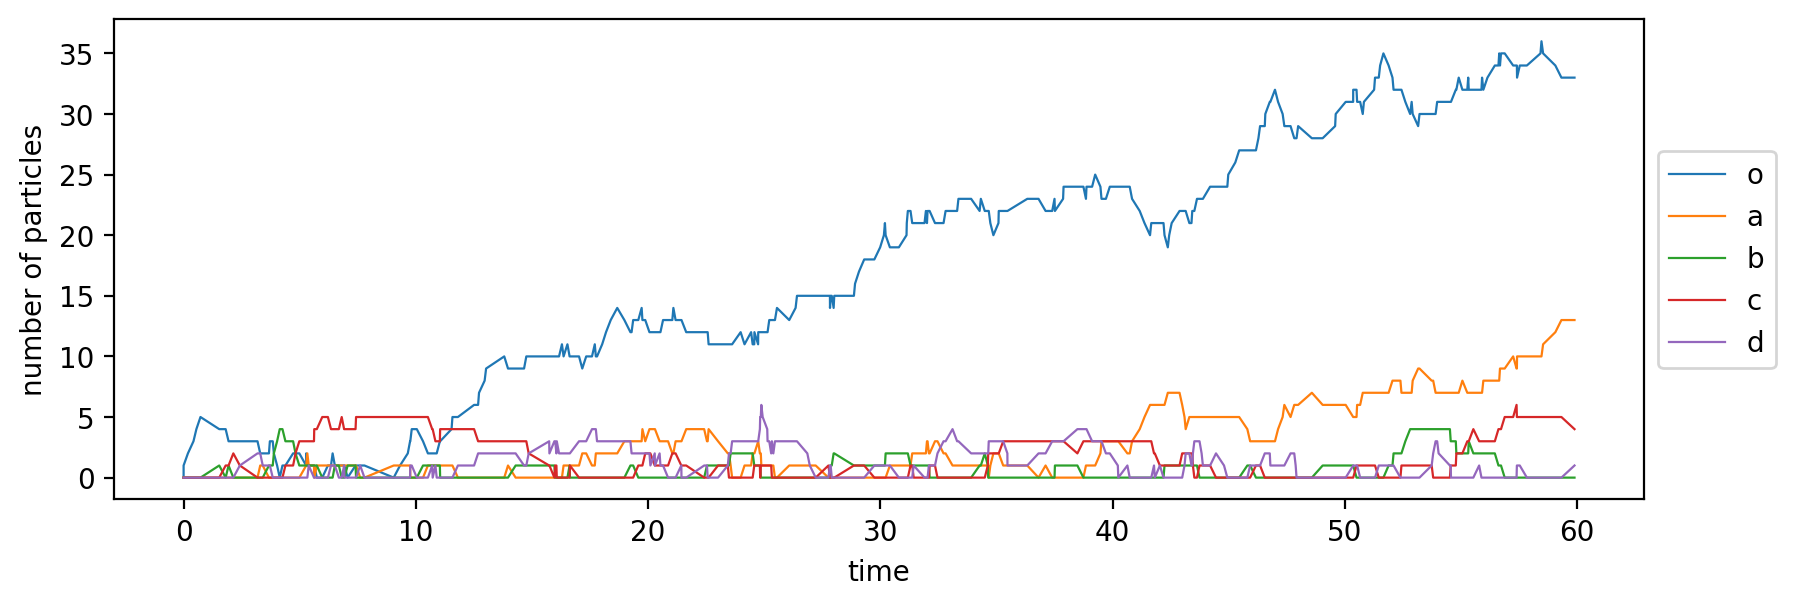

In [ ]:
fig = time_plot(np.array(ts), table.T, indices.keys(), ["d'"])